In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv("heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df.shape

(303, 14)

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df['target'].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

<AxesSubplot: >

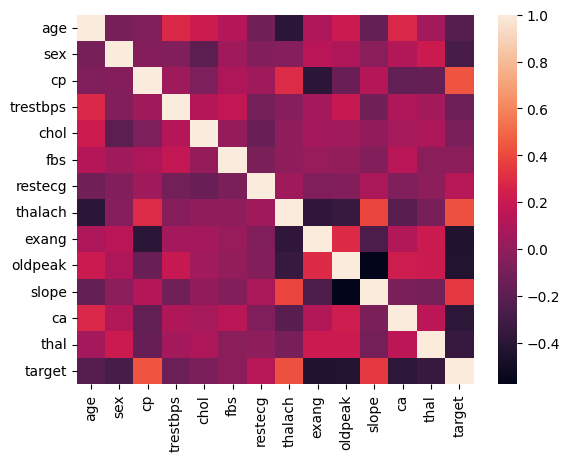

In [10]:
sns.heatmap(df.corr())

In [11]:
print(df.corr()["target"].abs().sort_values(ascending=False))
#Cela montre que la plupart des colonnes sont modérément corrélées avec la cible, mais 'fbs' est très faiblement corrélé.

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [12]:
#voir si ya des données dupliqué
df_d= df.duplicated().any()
print(df_d)


True


In [13]:
df=df.drop_duplicates()

In [14]:
df.shape

(302, 14)

In [15]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

<AxesSubplot: xlabel='target', ylabel='count'>

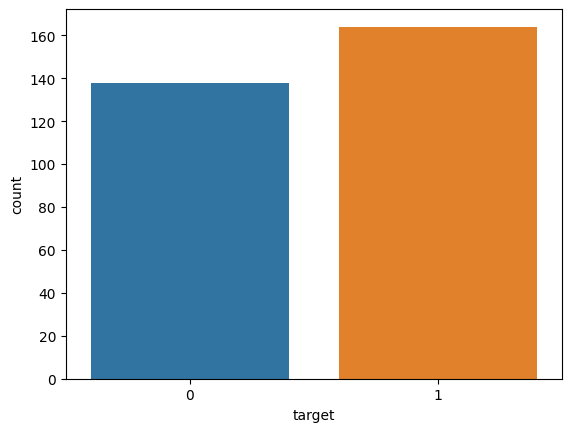

In [17]:
sns.countplot(x ='target', data = df)

In [19]:
df['sex'].value_counts()


1    206
0     96
Name: sex, dtype: int64

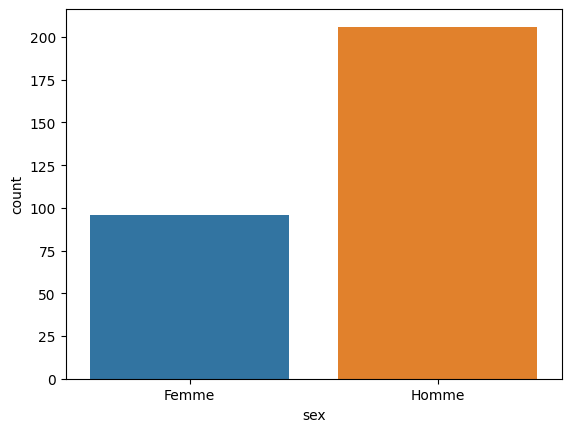

In [20]:
sns.countplot(x='sex', data=df)
plt.xticks([0,1], ['Femme', 'Homme'])
plt.show()

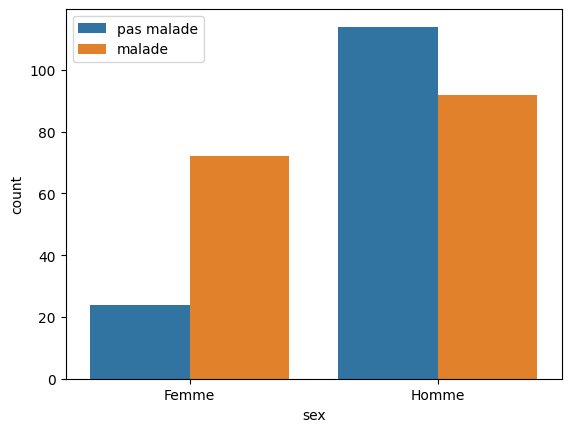

In [21]:
sns.countplot(x='sex', hue='target', data=df)
plt.xticks([0,1], ['Femme', 'Homme'])
plt.legend(labels=['pas malade','malade'])
plt.show()

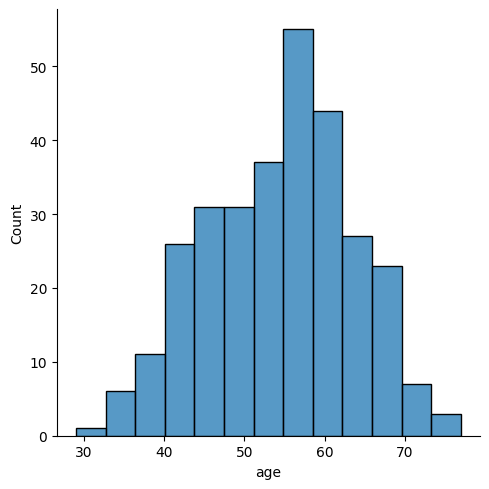

In [22]:
sns.displot(df['age'])
plt.show()

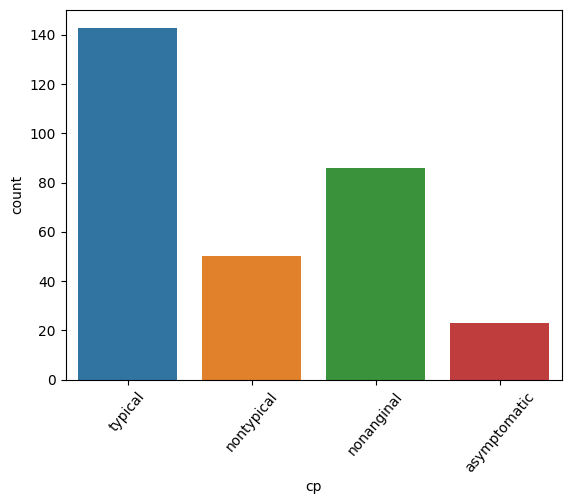

In [23]:
sns.countplot(x='cp', data=df)
plt.xticks([0,1,2,3], ['typical','nontypical','nonanginal','asymptomatic'])
plt.xticks(rotation=50)
plt.show()

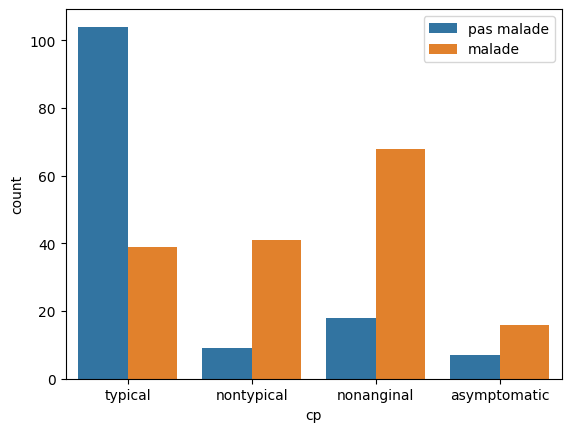

In [24]:
#personnes qui ont des douleurs thoralique selon leurs genre 
sns.countplot(x='cp', hue='target' , data=df)
plt.legend(labels=["pas malade", "malade"])
plt.xticks([0,1,2,3], ['typical','nontypical','nonanginal','asymptomatic'])
plt.show()


In [25]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

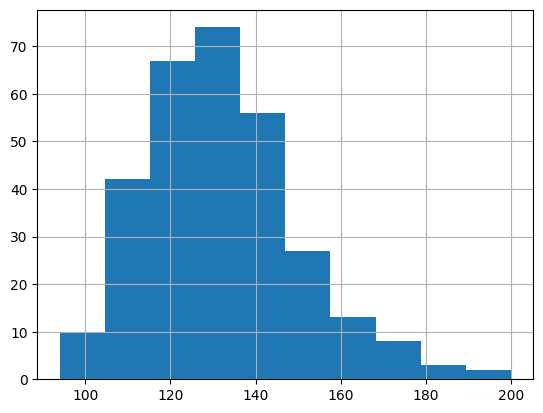

In [26]:
#resting blood pressure : tension artérielle au repos, la moyenne est entre 120 et 128  
df['trestbps'].hist() 
plt.show()

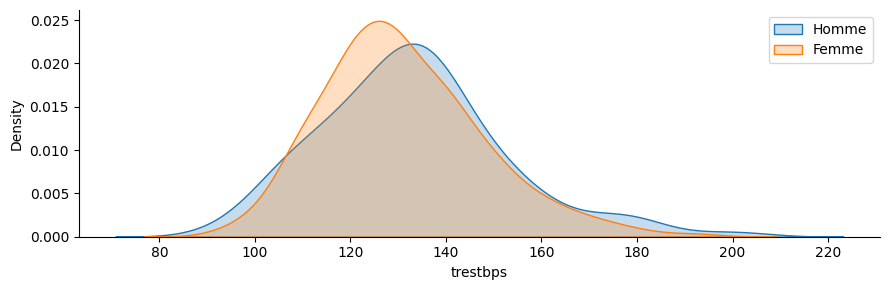

In [27]:
#comparer le niveau de variable de la tension artérielle au sex
#Grille multi-parcelles pour tracer des relations conditionnelles
g=sns.FacetGrid(data=df, hue='sex', aspect=3)
#tracer les distributions à l'aide de l'estimation de la densité
g.map(sns.kdeplot, 'trestbps', shade=True)
plt.legend(labels=('Homme', 'Femme'))
plt.show()


In [28]:
#tracer les variable continue 
cate_val=[]
cont_val=[]
for column in df.columns :
    if df[column].nunique() <= 10 :
        cate_val.append(column)
    else :
        cont_val.append(column)


In [29]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [30]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


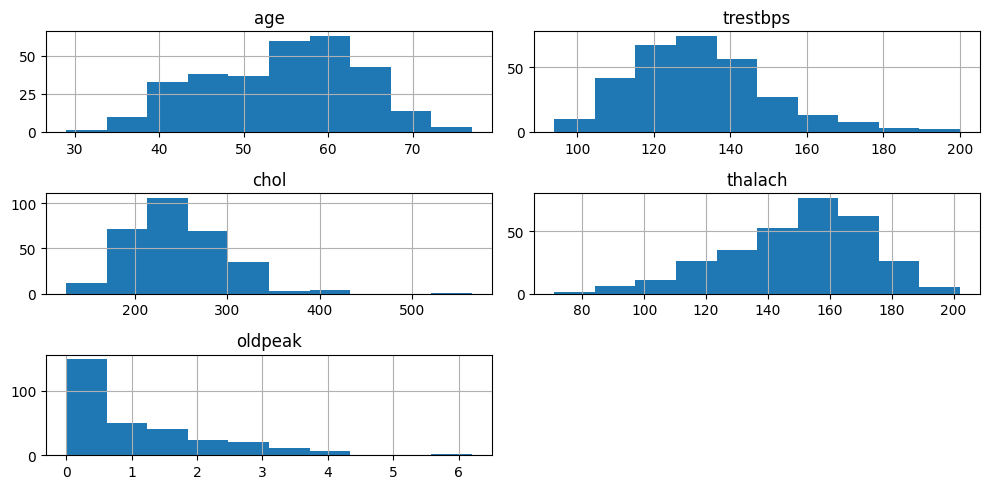

In [32]:
df.hist(cont_val, figsize=(10,5))
plt.tight_layout()
plt.show()

In [33]:
#trainement de données
from sklearn.model_selection import train_test_split
predictors = df.drop("target", axis=1)
target= df['target']
x_train,x_test,y_train,y_test = train_test_split(predictors, target,test_size=0.20, random_state=0)


In [34]:
x_train.shape

(241, 13)

In [35]:
x_test.shape

(61, 13)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
ir = LogisticRegression()
ir.fit(x_train, y_train)
y_pred_ir = ir.predict(x_test)
score_ir = round(accuracy_score(y_pred_ir, y_test)*100,2)
print(score_ir)

85.25


In [37]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb=nb.predict(x_test)
score_nb=round(accuracy_score(y_pred_nb,y_test)*100,2)
print(score_nb)

90.16


In [38]:
from sklearn import svm
sv=svm.SVC(kernel='linear')
sv.fit(x_train,y_train)
y_pred_svm=sv.predict(x_test)
score_svm=round(accuracy_score(y_pred_svm,y_test)*100,2)
print(score_svm)

86.89


In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
Y_pred_knn=knn.predict(x_test)
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)
print(score_knn)


62.3


In [46]:
from sklearn.tree import DecisionTreeClassifier
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(x_train,y_train)
    Y_pred_dt = dt.predict(x_test)
    score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)
print(score_dt)
   

78.69


In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
Y_pred_rf = rf.predict(x_test)
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)
print(score_rf)

86.89


In [54]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)
Y_pred_xgb = xgb_model.predict(x_test)
score_xgb = round(accuracy_score(Y_pred_xgb,y_test)*100,2)
print(score_xgb)


80.33


In [56]:
scores = [score_ir,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("Le score de précision obtenu en utilisant "+algorithms[i]+" est : "+str(scores[i])+" %")

Le score de précision obtenu en utilisant Logistic Regression est : 85.25 %
Le score de précision obtenu en utilisant Naive Bayes est : 90.16 %
Le score de précision obtenu en utilisant Support Vector Machine est : 86.89 %
Le score de précision obtenu en utilisant K-Nearest Neighbors est : 62.3 %
Le score de précision obtenu en utilisant Decision Tree est : 78.69 %
Le score de précision obtenu en utilisant Random Forest est : 86.89 %
Le score de précision obtenu en utilisant XGBoost est : 80.33 %


<AxesSubplot: xlabel='Algorithms', ylabel='Accuracy score'>

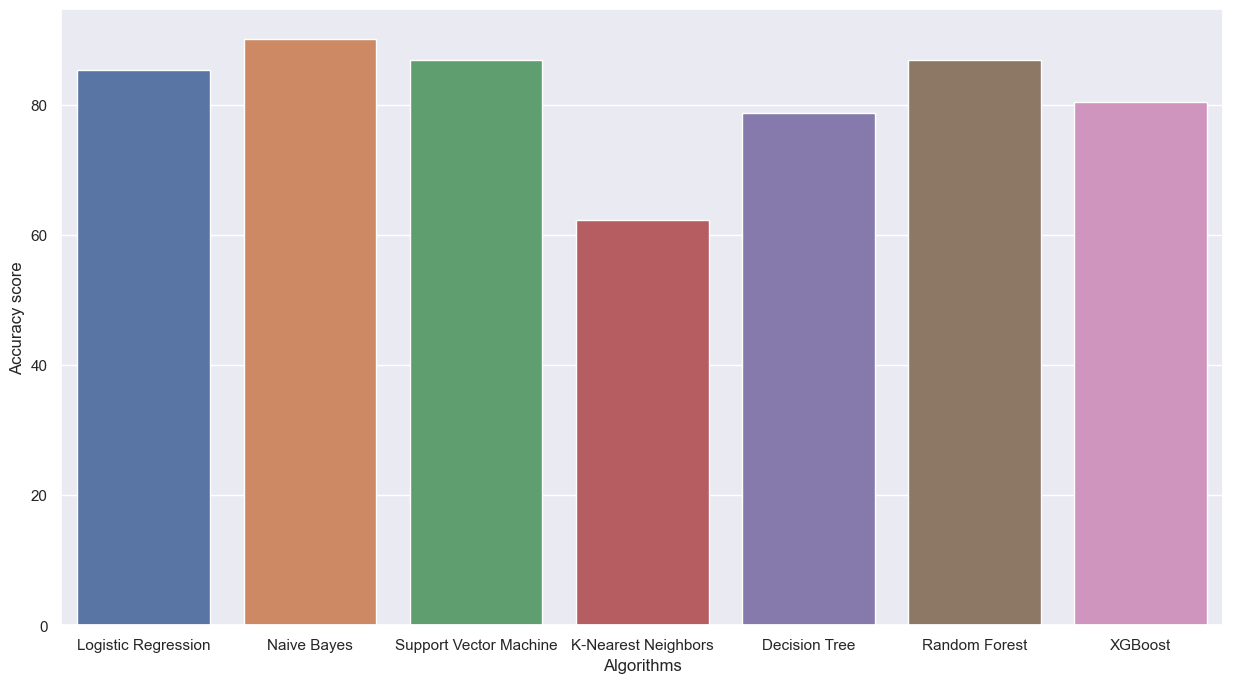

In [81]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=algorithms,y=scores)
 